In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cases = pd.read_csv('Cumulative_cases_data (1).csv')
cases = cases.drop(columns ='County Parameter Cum Curve')
cases["Count_Date"] = pd.to_datetime(cases["Day of Epi Dt"])
cases["month"] = cases.Count_Date.dt.month
cases["year"] = cases.Count_Date.dt.year
cases["day"] = cases.Count_Date.dt.day
cases["day_of_week"] = cases.Count_Date.dt.dayofweek
cases.head()

,Day of Epi Dt,Running Sum of Confirmed Cases By Epi Dt,Confirmed Cases By Epi Dt,Count_Date,month,year,day,day_of_week
0,"January 22, 2020",0,0,2020-01-22,1,2020,22,2
1,"January 23, 2020",0,0,2020-01-23,1,2020,23,3
2,"January 24, 2020",0,0,2020-01-24,1,2020,24,4
3,"January 25, 2020",0,0,2020-01-25,1,2020,25,5
4,"January 26, 2020",0,0,2020-01-26,1,2020,26,6


In [3]:
bikes = pd.read_csv('Eco-Totem_Capital_City_Trail_Bike_Counts.csv')
bikes.head()

,Count_Date,Count,OBJECTID
0,6/23/2015 11:00,92.0,0
1,6/23/2015 12:00,191.0,1
2,6/23/2015 13:00,156.0,2
3,6/23/2015 14:00,155.0,3
4,6/23/2015 15:00,243.0,4


In [4]:
bikes["Date"] = pd.to_datetime(bikes["Count_Date"])
bikes["month"] = bikes.Date.dt.month
bikes["year"] = bikes.Date.dt.year
bikes["day"] = bikes.Date.dt.day
bikes["hour"] = bikes.Date.dt.hour
bikes["day_of_week"] = bikes.Date.dt.dayofweek

bikes.head()

,Count_Date,Count,OBJECTID,Date,month,year,day,hour,day_of_week
0,6/23/2015 11:00,92.0,0,2015-06-23 11:00:00,6,2015,23,11,1
1,6/23/2015 12:00,191.0,1,2015-06-23 12:00:00,6,2015,23,12,1
2,6/23/2015 13:00,156.0,2,2015-06-23 13:00:00,6,2015,23,13,1
3,6/23/2015 14:00,155.0,3,2015-06-23 14:00:00,6,2015,23,14,1
4,6/23/2015 15:00,243.0,4,2015-06-23 15:00:00,6,2015,23,15,1


In [5]:
def map_season(x):
    if x < 3 or x > 11:
        return "winter"
    elif x >= 3 and x <= 4:
        return "spring"
    elif x >= 5 and x <= 8:
        return "summer"
    else:
        return "fall"
    
bikes["season"] = bikes["month"].apply(map_season)
bikes.head()

,Count_Date,Count,OBJECTID,Date,month,year,day,hour,day_of_week,season
0,6/23/2015 11:00,92.0,0,2015-06-23 11:00:00,6,2015,23,11,1,summer
1,6/23/2015 12:00,191.0,1,2015-06-23 12:00:00,6,2015,23,12,1,summer
2,6/23/2015 13:00,156.0,2,2015-06-23 13:00:00,6,2015,23,13,1,summer
3,6/23/2015 14:00,155.0,3,2015-06-23 14:00:00,6,2015,23,14,1,summer
4,6/23/2015 15:00,243.0,4,2015-06-23 15:00:00,6,2015,23,15,1,summer


In [6]:
bikes_2019 = bikes[bikes['year'] == 2019]
bikes_2020 = bikes[bikes['year'] == 2020]

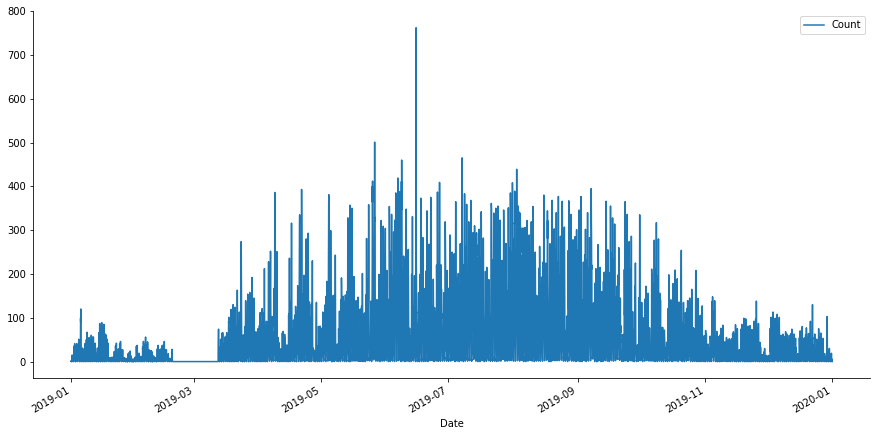

In [7]:
fig, ax = plt.subplots(figsize=(15,7.5))
plt.tick_params(axis='both', which='major', labelsize=10)
bikes_2019.plot.line(x='Date',y = 'Count', ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [17]:
import calendar
daily_bikes = bikes.groupby(["year","month","day"]).mean()["Count"].reset_index()
#daily_bikes['month'] = daily_bikes['month'].apply(lambda x: calendar.month_abbr[x])
#daily_bikes['date'] = daily_bikes['month'] +' '+ daily_bikes['day'].str
daily_bikes.head()

,year,month,day,Count
0,2015,6,23,203.307692
1,2015,6,24,129.416667
2,2015,6,25,91.375000
3,2015,6,26,106.541667
4,2015,6,27,164.666667


In [32]:
daily_bikes_2019 = daily_bikes[daily_bikes["year"] == 2019]
daily_bikes_2020 = daily_bikes[daily_bikes["year"] == 2020]
df1 = daily_bikes_2019.reset_index()
df1['test'] = None
for idx, row in df1.iterrows():
    df1['test'].loc[idx] = str(row['year']) + '/'+ str(row['month']) + '/' + str(row['day'])
df1["Date"] = pd.to_datetime(df1['test'])
df1

C:\Users\cs301\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,index,year,month,day,Count,test,Date
0,1288,2019,1,1,3.250000,2019/1/1,2019-01-01
1,1289,2019,1,2,12.583333,2019/1/2,2019-01-02
2,1290,2019,1,3,13.916667,2019/1/3,2019-01-03
3,1291,2019,1,4,17.416667,2019/1/4,2019-01-04
4,1292,2019,1,5,23.791667,2019/1/5,2019-01-05
5,1293,2019,1,6,9.625000,2019/1/6,2019-01-06
6,1294,2019,1,7,10.833333,2019/1/7,2019-01-07
7,1295,2019,1,8,20.791667,2019/1/8,2019-01-08
8,1296,2019,1,9,15.583333,2019/1/9,2019-01-09
9,1297,2019,1,10,18.333333,2019/1/10,2019-01-10


In [43]:
df2 = daily_bikes_2020.reset_index()
df2['test'] = None
for idx, row in df2.iterrows():
    df2['test'].loc[idx] = str(row['year']) + '/'+ str(row['month']) + '/' + str(row['day'])
df2["Date"] = pd.to_datetime(df2['test'])

C:\Users\cs301\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5,0,'Month')

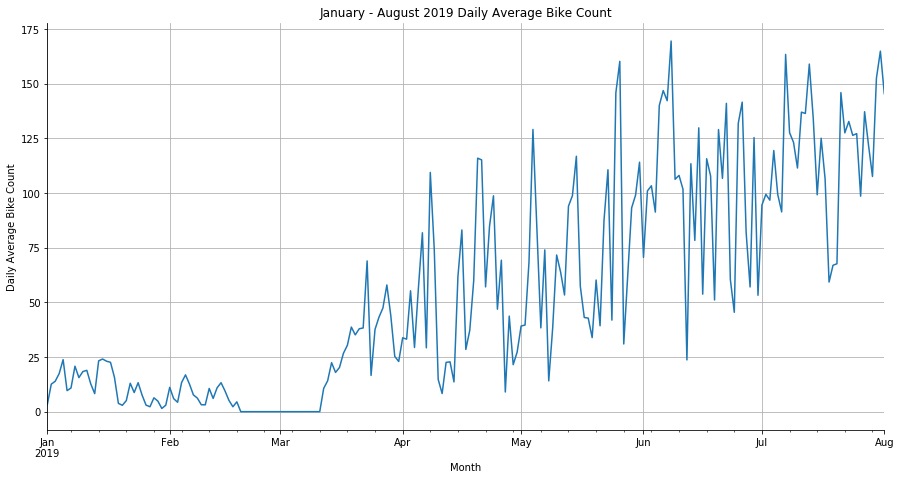

In [55]:
fig, ax = plt.subplots(figsize=(15,7.5))
plt.tick_params(axis='both', which='major', labelsize=10)
df1.plot.line(x='Date',y = 'Count', ax=ax, grid = True, legend = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2019, 8, 1)])
ax.set_title('January - August 2019 Daily Average Bike Count')
ax.set_ylabel('Daily Average Bike Count')
ax.set_xlabel('Month')
#df2.plot.line(x='Date',y = 'Count', ax=ax, grid = True)
#ax_2020 = daily_bikes_2020.plot.line(x = 'month', y = 'Count', figsize = (15,7.5), grid = True, ax = ax_2019)
#bikes_2020.plot.line(x = 'Count_Date', y = 'Count', figsize = (15,7.5), grid = True)

Text(0.5,0,'Month')

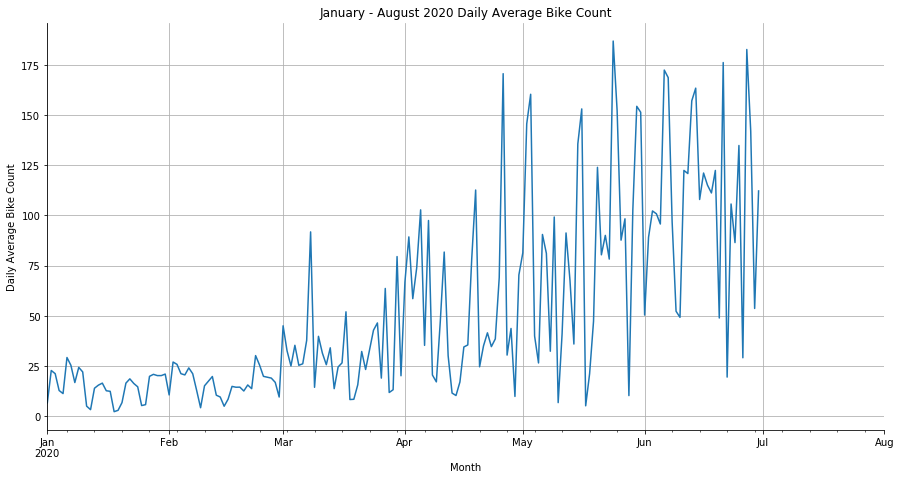

In [57]:
fig, ax = plt.subplots(figsize=(15,7.5))
plt.tick_params(axis='both', which='major', labelsize=10)
df2.plot.line(x='Date',y = 'Count', ax=ax, grid = True, legend = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 8, 1)])
ax.set_title('January - August 2020 Daily Average Bike Count')
ax.set_ylabel('Daily Average Bike Count')
ax.set_xlabel('Month')

In [11]:
bikes["covid"] = bikes[["month", "year"]].apply(lambda x: 'After Covid' if x["month"] >= 3 and x["year"] == 2020 else 'Before Covid', axis = 1)
bikes = bikes.sort_values(by='Count_Date')
bikes.sample(10)

,Count_Date,Count,OBJECTID,Date,month,year,day,hour,day_of_week,season,covid
28252,9/12/2018 15:00,158.0,28252,2018-09-12 15:00:00,9,2018,12,15,2,fall,Before Covid
20444,10/22/2017 7:00,4.0,20444,2017-10-22 07:00:00,10,2017,22,7,6,fall,Before Covid
22146,1/1/2018 5:00,0.0,22146,2018-01-01 05:00:00,1,2018,1,5,0,winter,Before Covid
41908,4/3/2020 17:00,182.0,41908,2020-04-03 17:00:00,4,2020,3,17,4,spring,After Covid
16198,4/28/2017 9:00,63.0,16198,2017-04-28 09:00:00,4,2017,28,9,4,spring,Before Covid
23200,2/14/2018 3:00,2.0,23200,2018-02-14 03:00:00,2,2018,14,3,2,winter,Before Covid
20556,10/26/2017 23:00,16.0,20556,2017-10-26 23:00:00,10,2017,26,23,3,fall,Before Covid
14434,2/13/2017 21:00,3.0,14434,2017-02-13 21:00:00,2,2017,13,21,0,winter,Before Covid
20072,10/6/2017 19:00,19.0,20072,2017-10-06 19:00:00,10,2017,6,19,4,fall,Before Covid
19004,8/23/2017 7:00,187.0,19004,2017-08-23 07:00:00,8,2017,23,7,2,summer,Before Covid


Text(0,0.5,'Count')

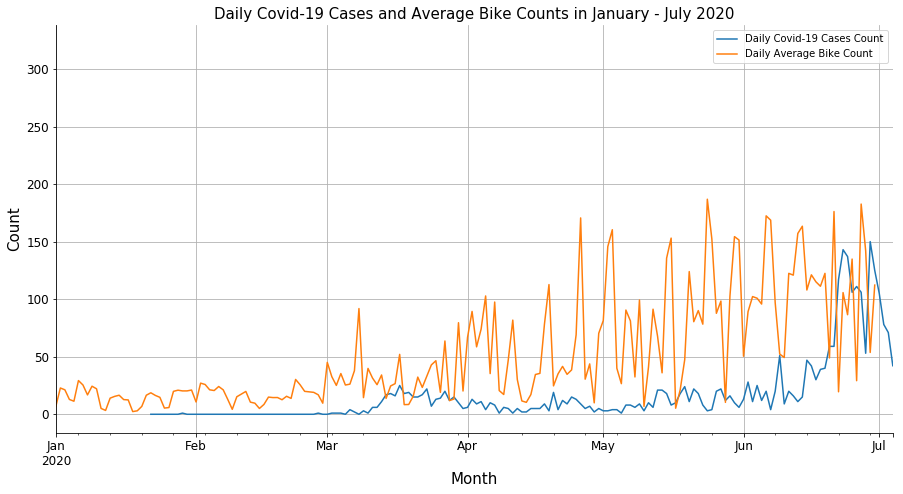

In [66]:
import datetime
fig, ax = plt.subplots(figsize=(15,7.5))
plt.tick_params(axis='both', which='major', labelsize=12)
cases.plot(x = 'Count_Date', y = 'Confirmed Cases By Epi Dt', ax = ax, grid = True, label = 'Daily Covid-19 Cases Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
df2.plot.line(x='Date',y = 'Count', ax=ax, grid = True, label = 'Daily Average Bike Count')
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 7, 4)])
ax.set_title('Daily Covid-19 Cases and Average Bike Counts in January - July 2020', fontsize = 15)
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)

Text(0,0.5,'Count')

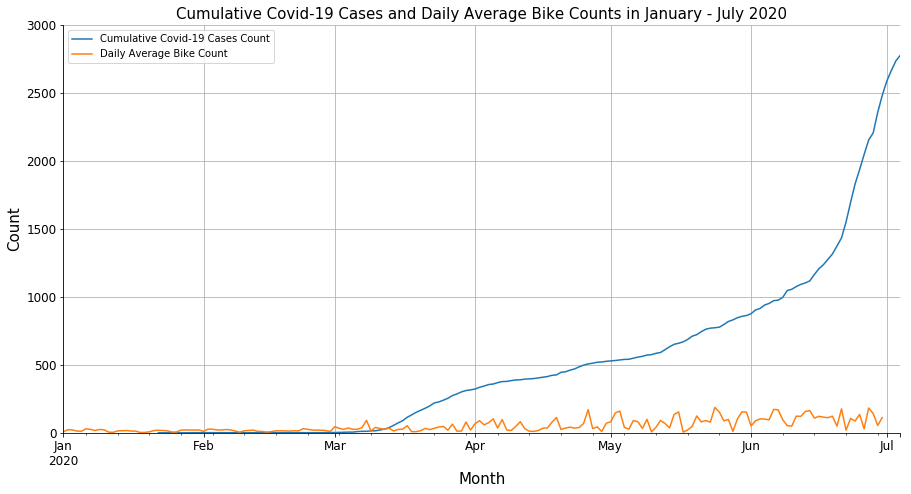

In [69]:
import datetime
fig, ax = plt.subplots(figsize=(15,7.5))
plt.tick_params(axis='both', which='major', labelsize=12)
cases.plot(x = 'Count_Date', y = 'Running Sum of Confirmed Cases By Epi Dt', ax = ax, grid = True, label = 'Cumulative Covid-19 Cases Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
df2.plot.line(x='Date',y = 'Count', ax=ax, grid = True, label = 'Daily Average Bike Count')
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 7, 4)])
ax.set_ylim([0,3000])
ax.set_title('Cumulative Covid-19 Cases and Daily Average Bike Counts in January - July 2020', fontsize = 15)
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)

